# Project: Classification - Hotel Booking Cancellation Prediction

## Marks: 30

Welcome to the project on classification. We will use the INN Hotels dataset for this problem.

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers' booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and overview of the dataset

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#To tune the model
from sklearn.model_selection import GridSearchCV

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#### Loading data

In [2]:
hotel = pd.read_csv("INNHotelsGroup.csv")

In [3]:
# copying data to another variable to avoid any changes to original data
data = hotel.copy()

#### View the first and last 5 rows of the dataset

In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


#### Check the info of the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* The dataset has **36,275 rows and 19 columns**. 

* `Booking_ID`, `type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, and `booking_status` are of **object type** while rest columns are numeric in nature.

* There are **no null values** in the dataset.

* **Booking_ID column is an identifier**. Let's check if each entry of the column is unique.

In [7]:
data.Booking_ID.nunique()

36275

**Observations:**
- We can see that **all the entries of this column are unique**. Hence, this column would not add any value to our analysis. 
- Let's drop this column.

#### Dropping the Booking_ID column

In [8]:
data = data.drop(["Booking_ID"], axis=1)

In [9]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Exploratory Data Analysis

#### Summary Statistics for numerical columns

#### Question 1: Write the observations from the below summary statistics (2 Marks)

In [10]:
#Selecting numerical columns and checking summary statistics
num_cols = data.select_dtypes('number').columns

data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


**Observations:**
- The vast majority of adults seem to come in pairs (2 adults), could be couples.
    - Few outliers with 4 adults and 0 adults minimum. If the 0 adult minimum means only children booked, that could be an error or a hotel which allows children to book without adults.
- Children behaves very differently from adults. The vast majority of bookings have 0 children. From the minimum all the way to the 75th percentile.
    - There's a huge outlier with 10 children. This affects the std deviation.
- Number of weekend nights has an interesting behaviour:
    - The bottom 25% of bookings do not have a single weekend night booked. The mean is close to 1 weekend night, 75th percentile is at 2 weekend nights.
    - However, the std deviation is 0.87. There's an outlier that booked 10 weekend nights, the outliers in this column probably affect this statistics.
- Number of week nights behaves very similarly:
    - There's outliers going all the way to 17 week nights which probably heavily affect the statistics like std.
    - On average, bookings have 2 week nights. 75th percentile is 3, 25th is 1. A small IQR. Minimum is 0 as expected, and then some very high outliers at the top.
- Required parking space is a binary variable. Most bookings, atleast up to the 75th percentile, do not require parking space. This is represented by the mean, which is very close to 0 (0.03).
- Lead time has a very wide range. From 0 at the minimum, to 443 days at maximum.
    - This high value at the top is an outlier, clients booking 443 days before their arrival is an exception, not the norm.
    - There's a lot of very high values, as the 75th percentile is clients booking 126 days before. 
        - These very high values heavily affect the mean and standard deviation (over 85 days each). On average, clients book nearly 3 months before arriving.
- Arrival year, month and date show that the data is relatively new:
    - All recorded values are between 2017 and 2018.
    - The monthly mean is August. The IQR is between May and October.
    - The daily mean makes sense, it is right in the middle of the month (16th).
- Repeated guest is a binary variable which lets us know if a guest is revisiting. Most guests are new, atleast up to the 75th percentile.
- Most bookings do not have previous cancellations (up to the 75th percentile). However, there are outliers of up to 13 previous cancellations.
- On the other hand, most clients do not have previous bookings not cancelled. Again, most clients seem to be new. There are some outliers with up to 58 not cancelled bookings.
- The average price per room per day has a wide range, from a minimum of  0 (which could be a mistake or special promotion) up to 540.
    - These extreme values on minimum and maximum seem to be outliers, as they are very separated from the 25th, 50th and 75th percentiles.
    - Having an average price of 0 on a day could either be a mistake or special cases. Should be explored in more detail.
    - The extremely high outliers could be explained due to the dynamic nature, maybe attributed to high demand seasons.
- Number of special request made by costumers is mostly 0. Only the 75th percentile has 1 special request, with a maximum of 5. Most clients do not make special requests.

In [11]:
#Checking the rows where avg_price_per_room is 0
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.0,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.0,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.0,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.0,2,Not_Canceled


- In the market segment column, it looks like **many values are complementary**. Let's check the market segment where the room prices are equal to 0.

In [12]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* It makes sense that most values with room prices equal to 0 are the rooms given as complimentary service given by the hotel.
* The rooms booked online might be a part of some promotional campaign done by the hotel. We will not treat these rows as we don't have the data to test this claim.

#### Check the distribution and outliers for some columns in the data

lead_time
Skew : 1.29


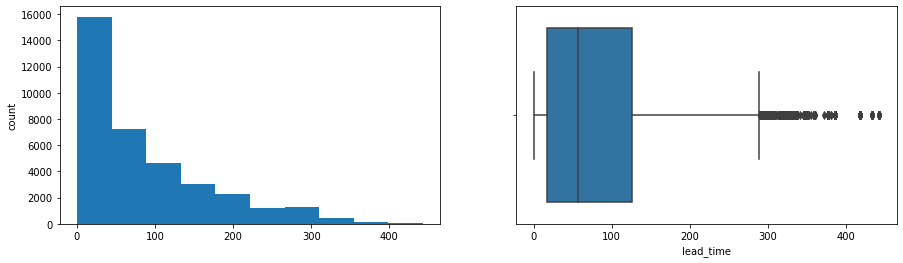

no_of_previous_cancellations
Skew : 25.2


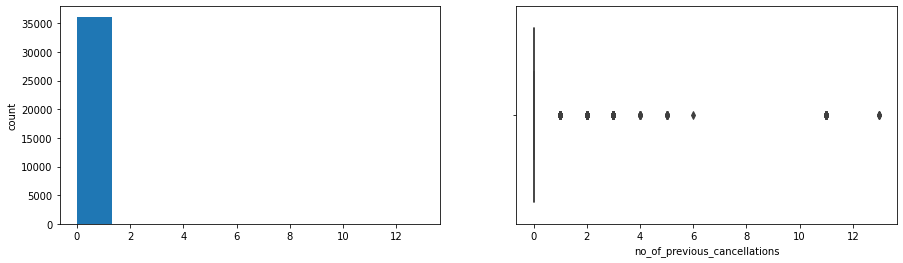

no_of_previous_bookings_not_canceled
Skew : 19.25


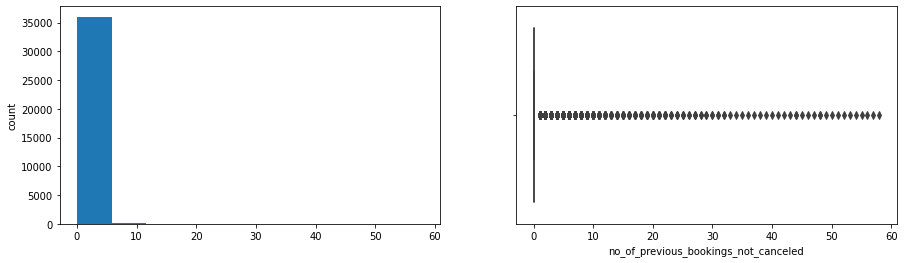

avg_price_per_room
Skew : 0.67


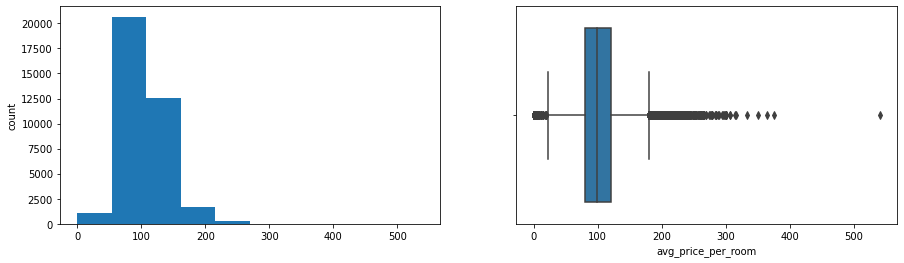

In [13]:
for col in ['lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room']:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

- The distribution of **lead time is right-skewed**. Many customers have made the booking on the same day of arrival as well. There are many outliers, **some customers made booking more than 400 days in advance**. 
- **Very few customers have more than one cancellation**. Some customers canceled more than 12 times.
- **Very few customers have more than 1 booking not canceled previously**. Some customers have not canceled their bookings around 60 times.
- **The distribution of average price per room is skewed to right**. There are outliers on both sides. The median price of a room is around ~100 euros. There is 1 observation where the average price of the room is more than 500 euros. This observation is quite far away from the rest of the values. We can treat this by clipping the value to the upper whisker (Q3 + 1.5 * IQR).

In [14]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [15]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

#### Now, let's check percentage of each category for some variables

#### Question 2: 

- **Write the code to check the percentage of each category for columns mentioned below (cat_cols) (2 Marks)**
- **Write your observations (2 Marks)**

In [16]:
cat_cols = ['no_of_adults', 'no_of_children', 'no_of_week_nights', 'no_of_weekend_nights', 'required_car_parking_space', 
        'type_of_meal_plan', 'room_type_reserved', 'arrival_month', 'market_segment_type', 'no_of_special_requests', 
        'booking_status']

#Write your code here
for cat in cat_cols:
    print(cat,":")
    print(data[cat].value_counts(normalize=True))
    print("\n\n\n")

no_of_adults :
2    0.719724
1    0.212130
3    0.063873
0    0.003832
4    0.000441
Name: no_of_adults, dtype: float64




no_of_children :
0     0.925624
1     0.044604
2     0.029166
3     0.000524
9     0.000055
10    0.000028
Name: no_of_children, dtype: float64




no_of_week_nights :
2     0.315479
1     0.261558
3     0.216099
4     0.082426
0     0.065803
5     0.044493
6     0.005210
7     0.003115
10    0.001709
8     0.001709
9     0.000937
11    0.000469
15    0.000276
12    0.000248
14    0.000193
13    0.000138
17    0.000083
16    0.000055
Name: no_of_week_nights, dtype: float64




no_of_weekend_nights :
0    0.465114
1    0.275534
2    0.250062
3    0.004218
4    0.003556
5    0.000937
6    0.000551
7    0.000028
Name: no_of_weekend_nights, dtype: float64




required_car_parking_space :
0    0.969014
1    0.030986
Name: required_car_parking_space, dtype: float64




type_of_meal_plan :
Meal Plan 1     0.767333
Not Selected    0.141420
Meal Plan 2     0.091110
Meal Pl

**Observations:**
- 71.9% of bookings have 2 adults, 21.2% have 1, and the remaining 6.9% is distributed between other values (3, 0 and 4). A large majority of bookings have 2 adults, and then most of the remaining ones have 1.
- 92.5% of bookings have no children. 4.4% have 1, 2.9% have 2. The remaining 0.3% is distributed among other values. It is safe to say that a vast majority of bookings have no children.
- Number of week nights has a pretty even % in 2 (31%), 1 (26%) and 3 (21%) week nights booked. All other values do not have as much %, only 0 5 and 6 week nights have more than 1%. Most bookings will have between 1 and 3 week nights.
- Weekend nights are different. Almost half of the bookings (46.5%) have 0 weekend nights booked. 27% have 1 weekend night and 25% have 2 nights. Every other number has less than 1%. The vast majority of clients book between 0 and 2 weekend nights.
- 96.9% of clients do not require a parking space, while 3% do. In most cases, clients will not need one.
- 76.7% of clients prefer a breakfast meal plan, while 14% do not select a meal plan and 9% a half board. Only close to 0.1% want a full board. Most clients only want a breakfast plan or no plan, and basically no (0.1%) clients want to have a full board.
- Most clients prefer room type 1 (77%), 16.6% room type 4 and the other room types have 2% or less each. We do not have a lot of information about these room types as they are encoded.
- 37.8% of clients arrive between August and October (Aug, Sept or Oct arrival). Almost no clients arrive between January and March (Jan, Feb or Mar).  The remaining months all have between 7% and 8.8% of the bookings. It seems that the August to October timeframe is the most successful one for receiving bookings.
- Market segment type is very interesting. More than half (63.9%) of bookings are online. 29% are offline, and the remaining less than 7% of clients are from a different market. Targeting online customers would probably yield the best results.
- Over half of all clients (54%) do not have any special requests. 31% have 1 request, and 12% 2. Higher numbers than 2 make up the remainder, and they all have less than 2%. In general, clients will have no or few special requests.
- 67.2% of clients do not cancel their booking, while 32.7% do. Almost a third of all bookings being cancelled can be very expensive for this hotel chain, as the effects of cancellation are very costly (as seen at the beginning of this document). Something must be done to improve the situation.

**Replacing values 9 and 10 for the number of children with 3 and encoding the target variable**

In [17]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

In [18]:
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

**We are done with univariate analysis and data preprocessing. Let's explore the data a bit more with bivariate analysis.**

Let's check the relationship of market segment type with the average price per room.

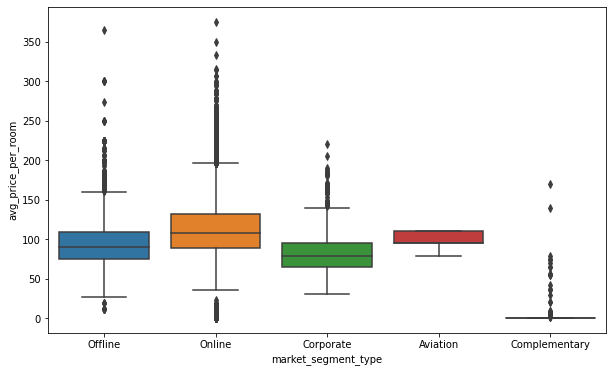

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="market_segment_type", y="avg_price_per_room")
plt.show()

* **Rooms booked online have the highest variations in prices.**
* The distribution for offline and corporate room prices are almost similar except for some outliers.
* Complementary market segment gets the rooms at very low prices, which makes sense.

**Let's see how booking status varies across different market segments. Also, how lead time impacts booking status**

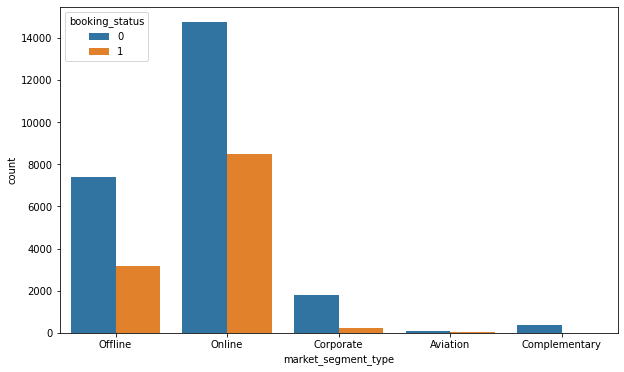

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment_type', hue='booking_status', data=data)
plt.show()

* **Online bookings have the highest number of cancellations.**
* Bookings made offline are less prone to cancellations.
* Corporate and complementary segment shows very low cancellations.

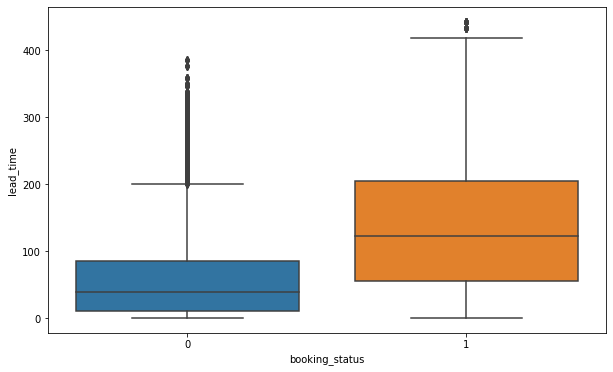

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="booking_status", y="lead_time")
plt.show()

* There's a big difference in the median value of lead time for bookings that were canceled and bookings that were not canceled. **The higher the lead time higher is the chances of a booking being canceled.**

**Now, let's check how the arrival month impacts the booking status**

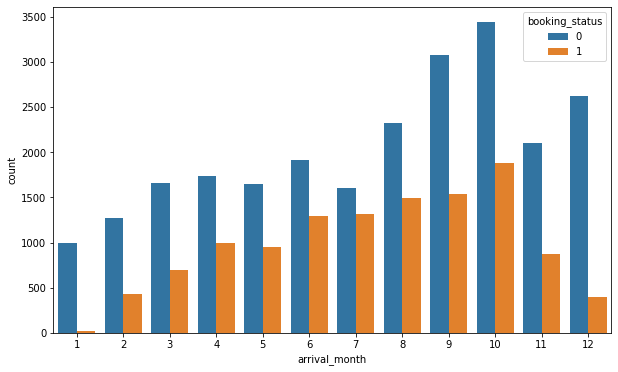

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='arrival_month', hue='booking_status', data=data)
plt.show()

- We observed earlier that the month of October has the highest number of bookings but the above plot shows that **October has the highest number of cancellations** as well.
- Bookings made for **December and January are less prone to cancellations**.

**Repeating guests are the guests who stay in the hotel often and are important to brand equity. Let's see what percentage of repeating guests cancel?**

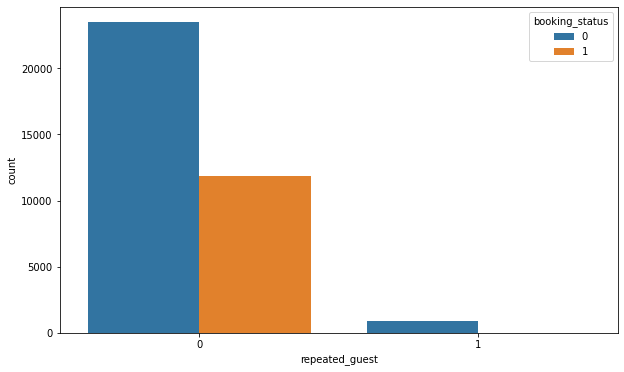

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='repeated_guest', hue='booking_status', data=data)
plt.show()

* There are **very few repeat customers but the cancellation among them is very less**. This is a good indication as repeat customers are important for the hospitality industry as they can help in spreading the word of mouth.

**We have explored different combinations of variables. Now, let's see the pairwise correlations between all the variables.**

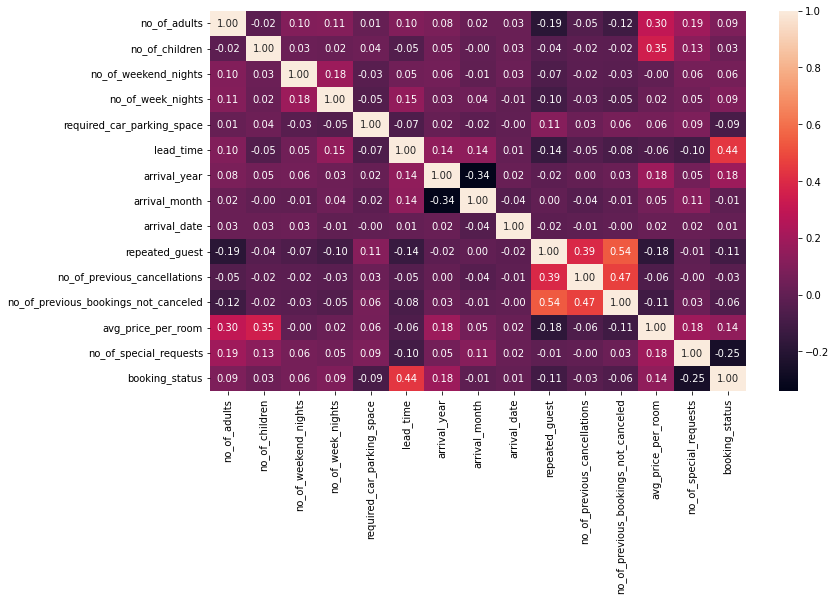

In [24]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

* There's a **positive correlation between the number of customers (adults and children) and the average price per room**. This makes sense as more the number of customers more rooms they will require thus increasing the cost.
* There's a **negative correlation between average room price and repeated guests**. The hotel might be giving some loyalty benefits to the customers.
* **Repeated guests have a positive correlation with the number of previous bookings canceled and previous bookings not canceled.** This implies that repeated customers are also likely to cancel their bookings.  
* There's a positive correlation between lead time and the number of weeknights a customer is planning to stay in the hotel.
* There's a **positive correlation between booking status and lead time**, indicating higher the lead time higher are the chances of cancellation.
* There's a negative correlation between the number of special requests from the customer and the booking status, indicating **if a customer has made some special requests the chances of cancellation might decrease**

**Now that we have explored our data, let's prepare it for modeling.**

## Preparing data for modeling

- Models cannot take non-numeric inputs. So, we will first create dummy variables for all the categorical variables.
- We will then split the data into train and test sets.

#### Question 3: 

- **Drop the target variable from the original data and store it in a separate dataframe `X` (1 Mark)**
- **Store the target variable in a separate series `Y` (1 Mark)**

In [25]:
#Remove the blanks and complete the below code
X=data.drop(columns={"booking_status"})
Y=data["booking_status"]

In [26]:
#Creating dummy variables 
#drop_first=True is used to avoid redundant variables
X = pd.get_dummies(X, drop_first=True)

In [27]:
#Splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.30, random_state=1)

## Building Classification Models

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem on hand.**

### Model evaluation criterion

#### Model can make wrong predictions as:

1. Predicting a customer will not cancel their booking but in reality, the customer will cancel their booking.
2. Predicting a customer will cancel their booking but in reality, the customer will not cancel their booking. 

#### Which case is more important? 
* Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs of unsold rooms. The hotel might also have to bear an additional cost of advertising the room again on different distribution channels.

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage the brand equity. 


#### How to reduce the losses?

* Hotel would want `F1 Score` to be maximized, greater the F1 score higher are the chances of minimizing False Negatives and False Positives. 

**Also, let's create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [28]:
#function to print classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### Logistic Regression

#### Question 4: Fit the logistic regression model on the train dataset using random_state=1 (2 Marks)

In [29]:
#define logistic regression model 
log_reg=LogisticRegression(random_state=1)
#fit the model
log_reg.fit(X_train, y_train) #write your code here

LogisticRegression(random_state=1)

**Let's check the coefficient of each dependent variable in the data**

#### Question 5: Write your observations on the below coefficients obtained from the logistic regression model (3 Marks)

In [30]:
pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)

market_segment_type_Online              0.629148
type_of_meal_plan_Not Selected          0.324141
no_of_weekend_nights                    0.181323
avg_price_per_room                      0.019673
lead_time                               0.015663
no_of_adults                            0.011646
no_of_week_nights                       0.003552
arrival_date                            0.001169
type_of_meal_plan_Meal Plan 3           0.000404
room_type_reserved_Room_Type 3          0.000343
arrival_year                           -0.001720
room_type_reserved_Room_Type 2         -0.004321
market_segment_type_Complementary      -0.008853
room_type_reserved_Room_Type 5         -0.011247
room_type_reserved_Room_Type 7         -0.017973
no_of_previous_cancellations           -0.024807
market_segment_type_Corporate          -0.031524
room_type_reserved_Room_Type 4         -0.033054
repeated_guest                         -0.043752
room_type_reserved_Room_Type 6         -0.046006
no_of_children      

**Observations:**
- As we know, these coefficients tell us log of odds values. When lineary combined, it will tell us something about the probability of our target being of a certain class.
- Positive impact on target variable:
    - Market_segment_type_Online: has the largest positive coefficient/positive impact on target variable. If a customer books online it increases the log odds of out target (booking cancelled) variable's classification by 0.629 units.
    - type_pf_meal_plan_Not Selected has the second biggest positive impact on our target variable.
    - no_of_weekend_nights has a large coefficient (0.18), although smaller than the previous ones.
    - avg_price_per_room, lead_time, np_of_adults, no_of_week_nights, arrival_date, type_of_meal_plan_Meal Plan 3, room_type_reserved_Room_Type 3 all have positive impact on the probability mentioned, but with smaller coefficients.
- Negative impact on target variable:
    - no_of_special_requests has the lowest negative coefficient (-1.56). This variable will make the largest negative impact on our log of odds of our target variable. As seen beforehand in the correlation matrix, the more requests the client makes, the least likely they are of cancelling the booking. We would still need to see the real value (by using exponential) to analyze it further.
    - market_segment_type_Offline also has a strong negative impact on our target variable, although not as big an impact as special requests. This value is -0.60, while type Online is +0.62, interestingly. They have almost opposite effects on our log of odds.
    - no_of_previous_bookings_not_canceled also has a negative impact on our target variable. Previously we saw that loyal customers are much less likely to cancel bookings.
    - required_car_parking_space, type_of_meal_plan_Meal Plan 2, arrival_month, no_of_children, room_type_reserved_Room_Type 6, repeated_guest, room_type_reserved_Room_Type 4, market_segment_type_Corporate, no_of_previous_cancellations, room_type_reserved_Room_Type 7, room_type_reserved_Room_Type 5, market_segment_type_Complementary, room_type_reserved_Room_Type 2, arrival_year all have negative impact on the previously mentioned probability, although smaller.

#### Question 6: Write your interpretations of the odds calculated from the logistic regression model coefficients (3 Marks)

In [31]:
odds = np.exp(log_reg.coef_[0]) #finding the odds

# adding the odds to a dataframe and sorting the values
pd.DataFrame(odds, X_train.columns, columns=['odds']).sort_values(by='odds', ascending=False) 

,odds
market_segment_type_Online,1.876011
type_of_meal_plan_Not Selected,1.382843
no_of_weekend_nights,1.198802
avg_price_per_room,1.019868
lead_time,1.015787
no_of_adults,1.011714
no_of_week_nights,1.003558
arrival_date,1.001169
type_of_meal_plan_Meal Plan 3,1.000404
room_type_reserved_Room_Type 3,1.000343


**Observations:**
- The odds of a customer who booked online cancelling are 1.876 times higher than those who don't. This makes sense, as we saw previously, online bookings have the highest cancellations.
- The odds of customers who do not select a meal plan cancelling their booking is 1.38 times those who do. This is despite most clients choosing a breakfast plan. This could be attributed to the fact that customers who don't want a meal plan have a lesser need for a hotel or haven't planned their trip as much.
- Clients who have special requests are 0.2 times as likely to cancel compared to those who don't. This makes sense, as seen previously, clients that make this special requests do not cancel their bookings as often.
- Clients who reserve offline cancel 0.54 times as much as those who reserve with other methods. This is a nice contrast compared to online clients which were analyzed starting this section.
- Clients who had previously not canceled are 0.8 times as likely to cancel compared to those in the other category. So, clients who have previously arrived to their bookings are less likely to cancel a new booking, but the impact isn't as big as other categories (offline and special requests).
- A lot of variables have a close to 1 odds of cancelling (close to same odds as comparison).

**Now, let's check the performance of the model on the training set**

#### Question 7: Check the performance on the training data and write your observations from the classification report and confusion matrix for the training set (3 Marks)

              precision    recall  f1-score   support

           0       0.82      0.89      0.86     17029
           1       0.74      0.61      0.67      8363

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.79      0.80      0.79     25392



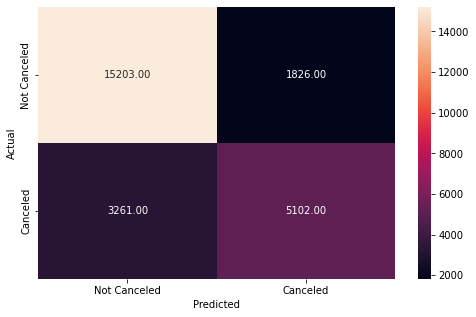

In [32]:
# Checking performance on the training data
y_pred_train = log_reg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Reading confusion matrix (clockwise):**

- **True Positive**: Predicting the customer will not cancel the booking and the customer does not cancel the booking
- **False Negative**: Predicting the customer will cancel the booking but the customer does not cancel the booking
- **True Negative**: Predicting the customer will cancel the booking and the customer cancels the booking
- **False Positive**: Predicting the customer will not cancel the booking but the customer cancels the booking

**Observations:**
- There are a lot more False Positive type errors than false negative (3261 vs 1826). The model is more likely to predict a customer will not cancel a booking when they will than it is to predict they will cancel when they won't. Both errors are very costly to the hotels, and it might be worth it to adjust the model to balance these 2 errors.
- The model has a lot of true positive predictions. 15203 not cancelled cases out of 17029 total were predicted correctly. 
- For customer who cancelled, 5102 out of 8363 cases were predicted correctly. This can and should be improved significantly, as it could be very costly to the hotel. Still, accurately predicting over 60% of the cancelled cases should save the hotel costs.
- The precision and recall for class 0 are both very high, which means the accuracy/F1 is very good.
- The precision for class 1 is somewhat high, but the recall isn't as high which drops this class's accuracy/F1. As seen before in the confusion matrix analysis, it is not nearly as accurate as class 0

**Precision-Recall Curve for Logistic Regression**

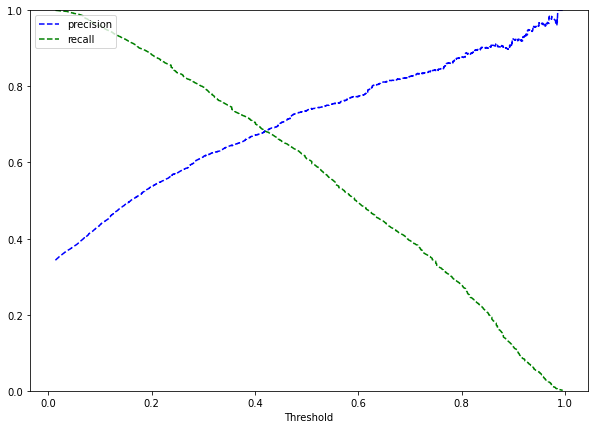

In [33]:
y_scores=log_reg.predict_proba(X_train) #predict_proba gives the probability of each observation belonging to each class


precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:,1])

#Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

**Observations:**
- We can see that **precision and recall are balanced for the threshold of about 0.4.**
- Let's try to calculate the exact threshold where precision and recall are equal.

In [34]:
#calculating the exact threshold where precision and recall are equal.
for i in np.arange(len(thresholds)):
    if precisions[i]==recalls[i]:
        print(thresholds[i])

0.4193398956396855


- The threshold of 0.42 would give a balanced precision and recall.

#### Question 8: Compare the performance of the model on training and testing sets after changing the threshold (2 Marks)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84     17029
           1       0.68      0.68      0.68      8363

    accuracy                           0.79     25392
   macro avg       0.76      0.76      0.76     25392
weighted avg       0.79      0.79      0.79     25392



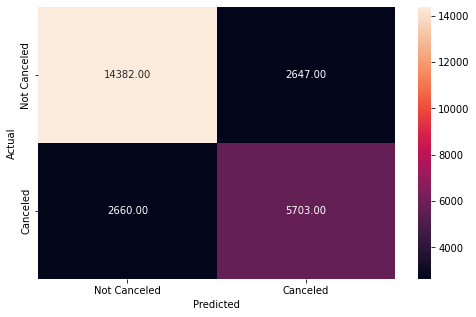

In [35]:
optimal_threshold1 = 0.42
metrics_score(y_train, y_scores[:,1]>optimal_threshold1)

**Let's check the performance of the model on the test data**

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      7361
           1       0.68      0.69      0.68      3522

    accuracy                           0.79     10883
   macro avg       0.77      0.77      0.77     10883
weighted avg       0.79      0.79      0.79     10883



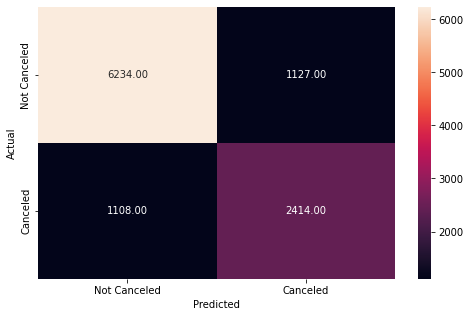

In [36]:
#Checking performance on the testing data
y_pred_test = log_reg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold1)

**Observations:**
- On the training data, class 0 f1 dropped from 0.86 to 0.84, as recall dropped even if precision got better. The original threshold was better for this class. However, the drop is small (0.02). Meanwhile, class 1 precision dropped from 0.74 to 0.68, and recall improved from 0.61 to 0.68. The overall accuracy for class one improved by 0.01. This threshold changes were not that effective or worth it in the training data.
- Let's see test data:
    - Out of 7361 customers who didn't cancel, 6234 were predicted properly. 1127 were predicted as cancelling even if they didn't. This is costly on the hotel's reputation, as they will not give proper service to clients who won't cancel.
    - Out of 3522 clients who cancelled, 2414 were predicted properly, while 1108 were predicted as not cancelling. Again, catching these 2414 customers could save some costs, but the low accuracy can still be costly.
    - Both the precision and recall for class 0 are identical, with an f1 score of 0.85 which means the model is decent for this class, but could be improved.
    - Both the precision and recall for class 1 are almost the same (0.68 and 0.69), for an overall class accuracy of 0.68. This is very low.
    - Overall, both recall and precision have a less than 0.8 accuracy which is not the best.
    - While the model does catch some clients who will cancel, it will also have false negatives which can really hurt the hotel's reputation and standards.

### K - Nearest Neighbors (KNN)

- KNN is a distance based algorithm and all distance based algorithms are affected by the scale of the data.
- We will scale the attributes (dataframe X defined above) before building the KNN model.
- Then We need to identify the value of K to be used in KNN. We will use **GridSearchCV** to find the optimal value of K along with other hyperparameters.

In [37]:
# scaling the data
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  #fit_transform the training data
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) #transform the testing data

### Using GridSearchCV for find the value of K and hyperparameter tuning

**Points to note:**

* Hyperparameter tuning is tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation.
* **Grid search** is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* Grid search is an exhaustive search of values that tries many iterations to compute the optimum values of hyperparameters. So, **it might take up to 30 minutes for the code to run depending on the number of values and hyperparameters passed.**  
* The hyperparameters that we are tuning are:

    - **n_neighbors**: Number of neighbors to use.

    - **weights={'uniform', 'distance'}**
        - uniform : uniform weights. All points in each neighborhood are weighted equally.
        - distance : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors that are further away.

    - **p**: When p = 1, this is equivalent to using Manhattan_distance (L1), and Euclidean_distance (L2) is used for p = 2.

In [38]:
knn = KNeighborsClassifier()

params_knn = {'n_neighbors':np.arange(2,20,2), 'weights':['uniform','distance'], 'p':[1,2]}

grid_knn = GridSearchCV(estimator=knn, param_grid=params_knn, scoring='f1', cv=10)

model_knn=grid_knn.fit(X_train_scaled,y_train)

knn_estimator = model_knn.best_estimator_
print(knn_estimator)

KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')


#### Question 9: 

- **Fit the KNN model on the scaled training data using the optimal values of hyperparameters obtained from GridSearchCV (1 mark)**
- **Check the performance of the model on the scaled training and testing sets (2 Marks)**
- **Compare the performance and write your observations (1 Marks)**

In [40]:
#Fit the KNN model on the scaled training data
knn_estimator.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14, p=1, weights='distance')

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17029
           1       1.00      0.99      0.99      8363

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392



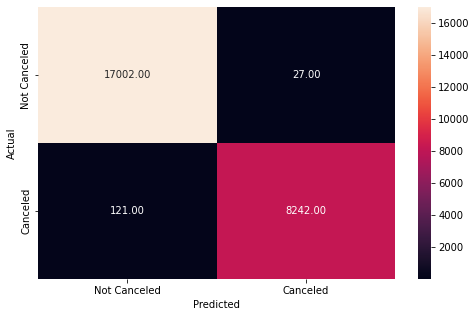

In [42]:
#Make predictions on the scaled training data and check the performance (using metrics_score function)

y_pred_train = knn_estimator.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7361
           1       0.82      0.68      0.74      3522

    accuracy                           0.85     10883
   macro avg       0.84      0.81      0.82     10883
weighted avg       0.85      0.85      0.84     10883



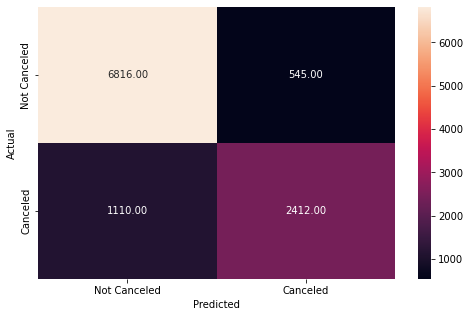

In [43]:
#Make predictions on the scaled testing data and check the performance (using metrics_score function)
y_pred_test = knn_estimator.predict(X_test)
metrics_score(y_test, y_pred_test)

**Observations:**
- The performance for both class 1 and class 2 is amazing on the training set,  tne precision and recall on both classes being over 0.99. This gets represented in an overall 0.99 accuracy, which is very good. As can be seen in the confusion matriz, 17002 out of 17029 not cancelled customers got predicted correctly, while 8242 out of 8363 cancelled customers got classified properly. This would represent a lot of saved costs for the hotel company.
- However, this amazing performance might be an overfit, as the test data results are not nearly as good. 
    - The class 0 precision is 0.86, which is decent but could be improved. The recall is 0.93, which is very good, for an overall f1-score of 0.89, which is better than Logistic Regression results.
    - Meanwhile, class 1 is a lot worse, precision is only 0.82 and recall is a measly 0.68. The accuracy is still better than logistic regression, with 0.74.
    - Overall, both recall and precision have averages of over 0.8, so a big improvement over logistic regression but still not perfect.
        - As it can be appreciated in the confusion matriz. While not cancelled predictions are made properly for 6816/7361 of these customers, only 2412 out of 3522 cancelling customers get labeled correctly. There are a lot of false positives.
- Overall, this model is our best performing one yet. However, it could still get improved, with a very low recall and accuracy for class 1 on test set. As seen in the training set, the model is overfitting, and not performing as well as it could on the test set as a consequence of this.

#### Question 10: Write the conclusion on the key factors that are driving the approval of loan and write your recommendations to the business on how can they minimize the number of cancellations. (5 Marks)

### Conclusion:

- To predict if a reserving hotel customer would cancel or not, we first analyzed the stats of all the data columns to see if there were outliers or null values.
- Afterwards, we checked the percentage of customers in each of the categorical variables. We found out that nearly 1/3rd of all reservations were cancelled. This is very costly for a hotel, as it forces them into not selling rooms or having to give them out cheaper.
- We analyzed the correlations to find out which clients were more likely to cancel or not cancel based on other properties. We found out that clients who wanted special features tend to not cancel (as well as loyal clients), while clients who reserve online cancel the most.
- We tried to find the best model to predict if a customer would cancel or not. This model **has** to be accurate no matter what, as getting false negatives (predicting the customer will cancel the booking but the customer does not cancel the booking) could hurt the hotel's reputation very badly as well as the customer's experience. Meanwhile, false positives (predicting the customer will not cancel when they do) is very costly for the aforementioned reasons.
- We tried logistic regression, which is a probabilistic approach, and found out that the customers most likely to cancel are those who book online and don't select meal plans. Meanwhile, the customers who ask for special requirements, book offline and have previously booked without cancelling; are the ones least likely to cancel the reservation.
- The models we tried worked to some extent, but logistic regression only had an overall accuracy of 0.79, with a lot of false positives which could be really costly and might not be precise enough.
- KNN model was more accurate, with an overall accuracy of 0.85. This might be good enough, considering the false positives only made up 7.43% of the not cancelled customer predictions (out of all the customers who didn't cancel, only 7.43% were misclassified). So the reputation won't be hurt much, and 68% of the customers who will cancel were predicted properly. Even if not perfect, predicting these many cancelling customers can help reduce the cost of caused by them significantly.
    - This model was overfitting and could possibly be improved for even more precision, but its low false positive rate is a good sign.
    - A lot of variables, as seen in logistic regression, had cancellation odds very close to 1. Maybe the model could be rebuilt with different features.

### Recommendations:

- As mentioned previously, online customers who do not choose a meal plan are most likely to cancel. Number of weekend nights also seems to have a positive effect on driving up cancellations. 
- Incentivizing for offline bookings for clients who have the possibility (are near the area) could have a good efect on driving down cancellations.
- The biggest factor in minimizing cancellations, by far, was customers having special requirements in their rooms. Maybe promoting these "custom, special requirements" to customers when they book (both offline and online) could really help. Because, if they do choose a custom requirement, this might incentivize them to not cancel (and as seen with the data, there actually is a relation between this 2 variables).
- Because of avg cost per night, it seems that loyal customers already get special rewards, and they are less likely to cancel. Maybe a marketing strategy which lets new clients know that they will get special discounts and rewards for consecutive visits and not cancelling could drive the cancellation rate down (specially considering the fact that customers who have booked without cancelling previously are less likely to cancel).